In [1]:
from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd


num_good_traj = 0
my_dir = '/workspace8/gabriele/RUNS/exp_breakout_17'
exps = glob(my_dir+'*')
d = exps[0]
df = load_results(d)



fig = plt.figure(clear=True, figsize=(11,11))

df2 = pd.DataFrame() 

df['f']= df['l'].cumsum()/1000000


df['perf']= df['ereward']/(df['max_reward'])
df['perf'].where(df['perf']>0,0,inplace=True)
df['goal'] = df['perf']>0.9  #guess a threadshold

df2['len_real'] = df['l'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['f_real']= df2['len_real'].cumsum()/1000000
df2['reward_woD'] = df['reward_woD'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['real_perf']= df2['reward_woD']/(df['max_reward'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))])

time_limit = 0
fig = plt.figure(clear=True, figsize=(15,9))

num_good_traj = df2['real_perf'][df2['real_perf'] > 0].count()
roll =1000
total_time = df['t'].iloc[-1]
total_steps = df['l'].sum()
total_episodes = df['r'].size

ax = plt.subplot(2, 2, 1)
ax.set_title(' {} total time: {:.1f} h FPS {:.1f}'.format(d.upper(),total_time/3600, total_steps/total_time))
df[['f','r']].rolling(roll).mean().iloc[0:-1:40].plot('f','r',  ax=ax,legend=False)
df[['f','ereward']].rolling(roll).mean().iloc[0:-1:40].plot('f','ereward',  ax=ax,legend=False)
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('Reward')
#plt.xlim((0, xlim_))
ax.grid(True)

ax = plt.subplot(2, 2, 2)
df[['f','min_value']].rolling(roll).mean().iloc[0:-1:40].plot('f','min_value', ax=ax,legend=False)
df[['f','max_value']].rolling(roll).mean().iloc[0:-1:40].plot('f','max_value', ax=ax,legend=False)
df[['f','mean_value']].rolling(roll).mean().iloc[0:-1:40].plot('f','mean_value', ax=ax,legend=False)
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('Min Value')
#plt.xlim((0, xlim_))
ax.grid(True)

ax = plt.subplot(2, 2, 3)
df2[['f_real','real_perf']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','real_perf', ax=ax,legend=False)
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('Performance without Deomnstrations')
#plt.xlim((0, xlim_))
ax.grid(True)

ax = plt.subplot(2, 2, 4)
df[['l']].rolling(roll).mean().iloc[0:-1:40].plot(y='l', ax=ax,legend=False)
ax.set_xlabel('N. episodes')
ax.set_ylabel('Episode lenght')
#plt.xlim((0, xlim_))
ax.grid(True)

/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


KeyError: 'max_reward'

Text(0.5, 0, 'N. steps (M)')

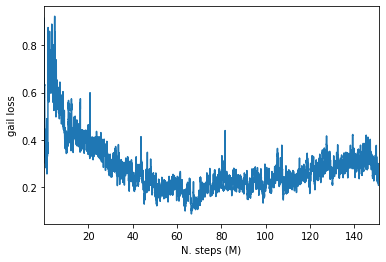

In [22]:
my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_gail_258/loss_monitor/loss_monitor.csv'
data = pd.read_csv(my_dir) 
roll = 10
data['f'] = (data.index*12*1000)/1000000
data[['f', 'gail_loss']].rolling(roll).mean().plot('f', 'gail_loss',legend=False)
plt.ylabel("gail loss")
plt.xlabel('N. steps (M)')


Text(0.5, 0, 'N. steps (M)')

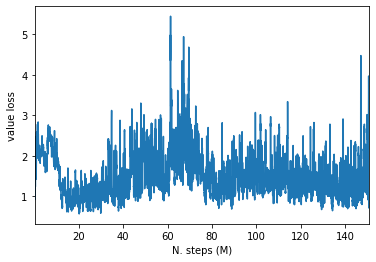

In [23]:
data[['f', 'V_loss']].rolling(roll).mean().plot('f', 'V_loss',legend=False)
plt.ylabel("value loss")
plt.xlabel('N. steps (M)')

Text(0.5, 0, 'N. steps (M)')

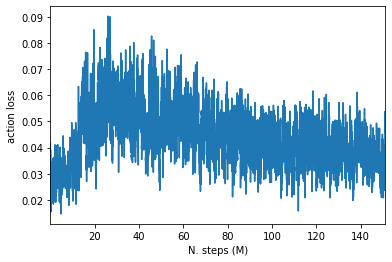

In [24]:
data[['f', 'action_loss']].rolling(roll).mean().plot('f', 'action_loss',legend=False)
plt.ylabel("action loss")
plt.xlabel('N. steps (M)')

Text(0.5, 0, 'N. steps (M)')

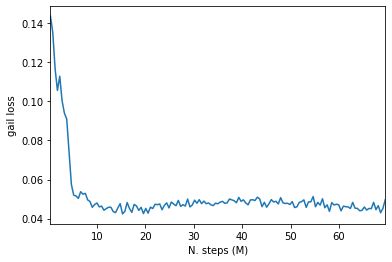

In [8]:
my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_bc_gail_26/loss_monitor/loss_monitor.csv'
data = pd.read_csv(my_dir) 
roll = 10
data['f'] = (data.index*12*1000)/1000000
data[['f', 'action_loss']].rolling(roll).mean().iloc[0:-1:40].plot('f', 'action_loss',legend=False)
plt.ylabel("gail loss")4
plt.xlabel('N. steps (M)')
